# Mall Customer Segmentation Analysis

## Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import time

## Loading the Data


In [3]:
file_path = '../data/Mall_Customers.csv'
mall_customers_df = pd.read_csv(file_path)

## Exploring Data Analysis

In [4]:
mall_customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mall_customers_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
missing_values = mall_customers_df.isnull().sum()
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
duplicate_rows = mall_customers_df[mall_customers_df.duplicated()]
duplicate_rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


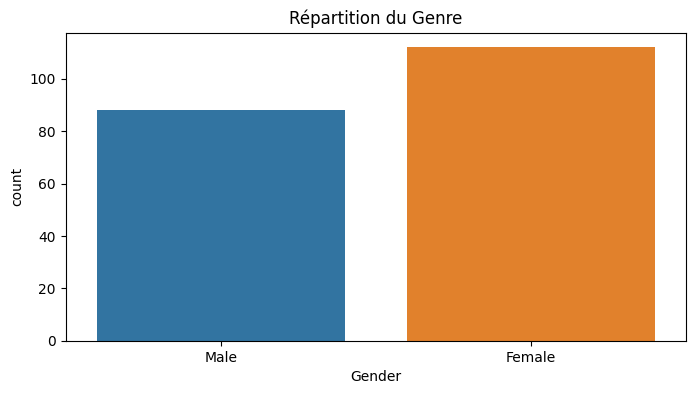

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=mall_customers_df)
plt.title('Répartition du Genre')
plt.show()

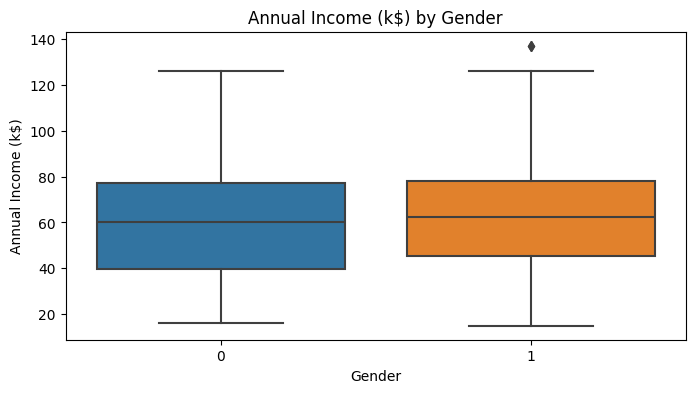

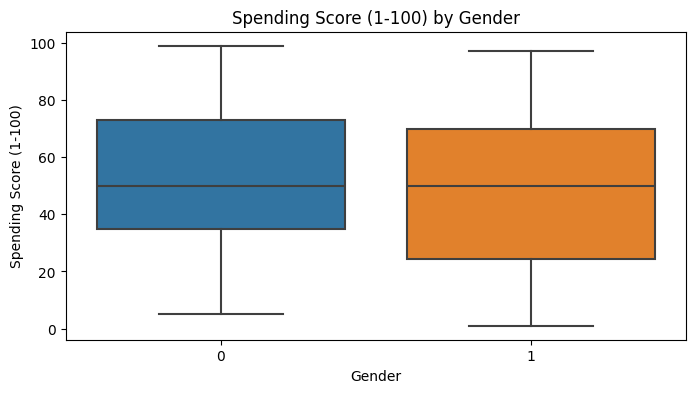

In [40]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_customers_df)
plt.title('Annual Income (k$) by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_customers_df)
plt.title('Spending Score (1-100) by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

/var/folders/rt/0hb6rtq14291d__lx9m1jbd00000gn/T/ipykernel_36803/1351971139.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mall_customers_df.corr(), annot=True, cmap='coolwarm')


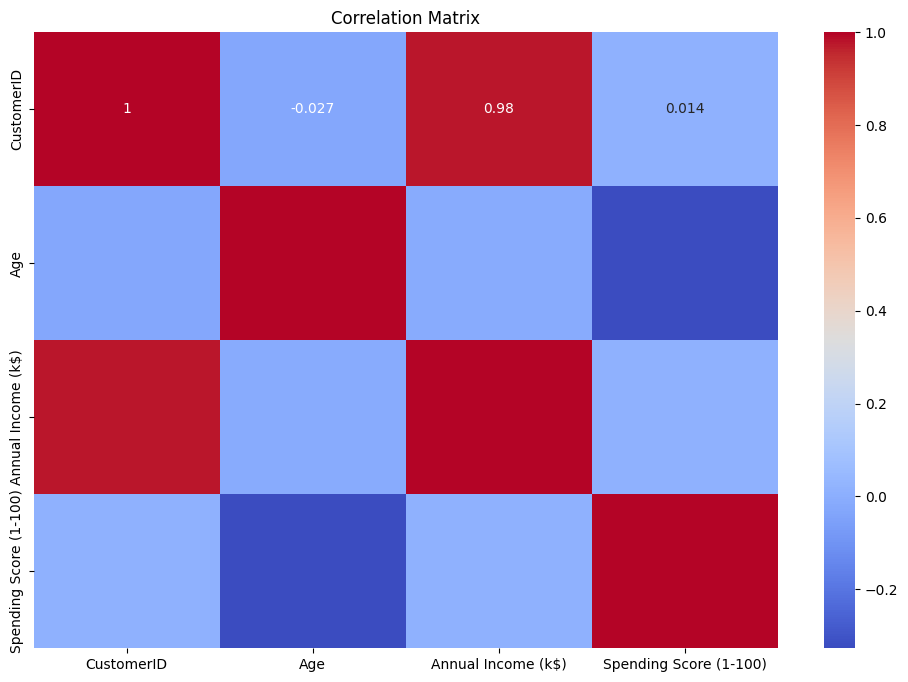

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(mall_customers_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

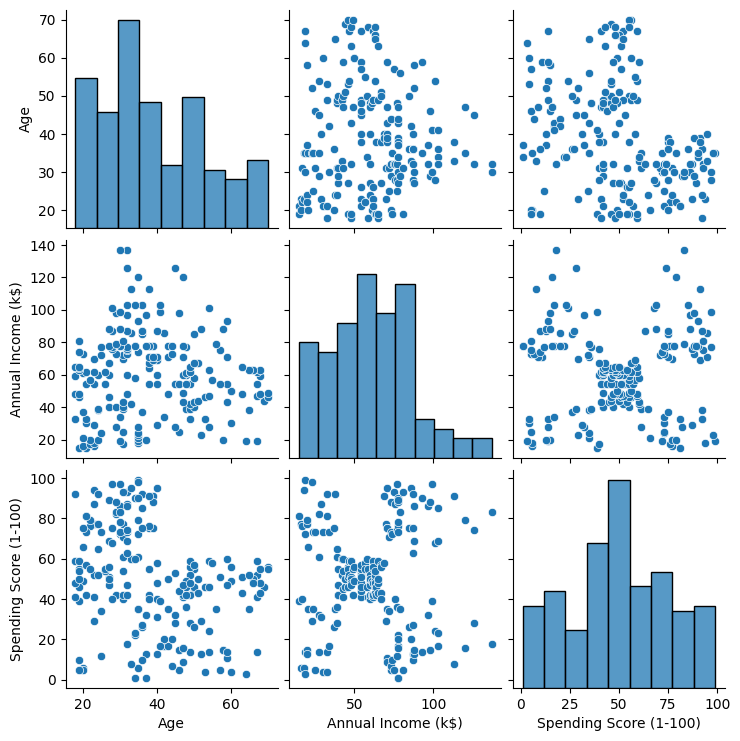

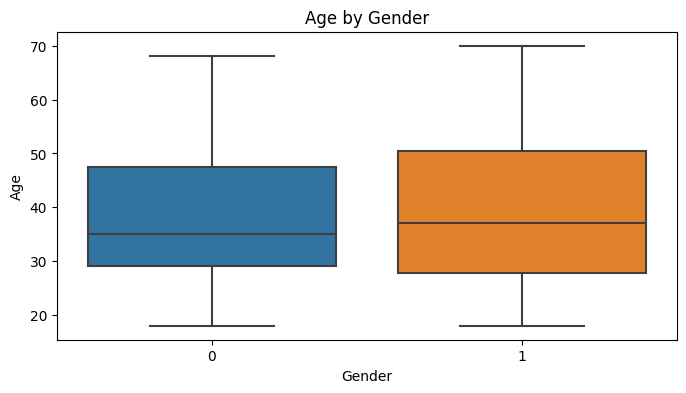

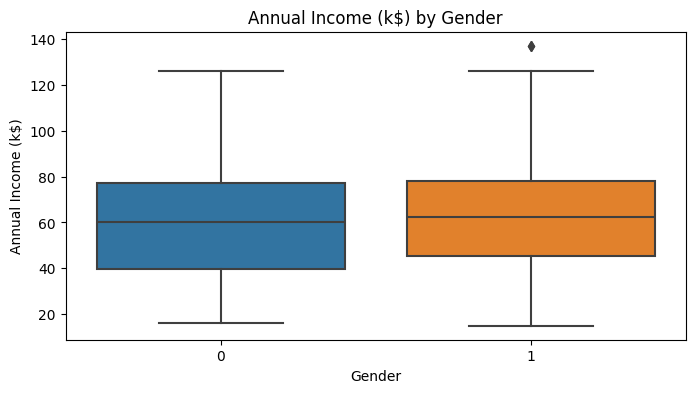

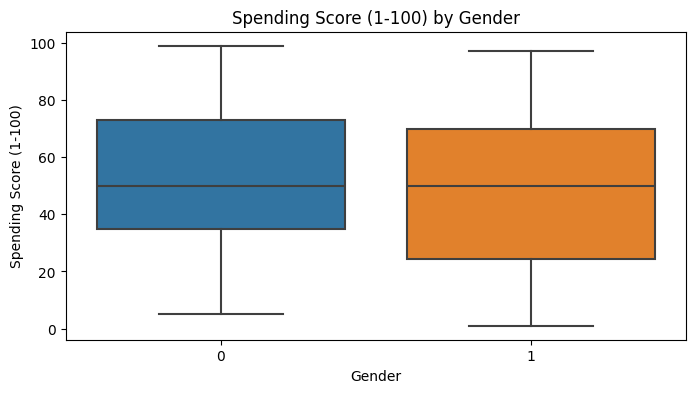

In [39]:
num_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

sns.pairplot(mall_customers_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Gender', y=col, data=mall_customers_df)
    plt.title(f'{col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.show()

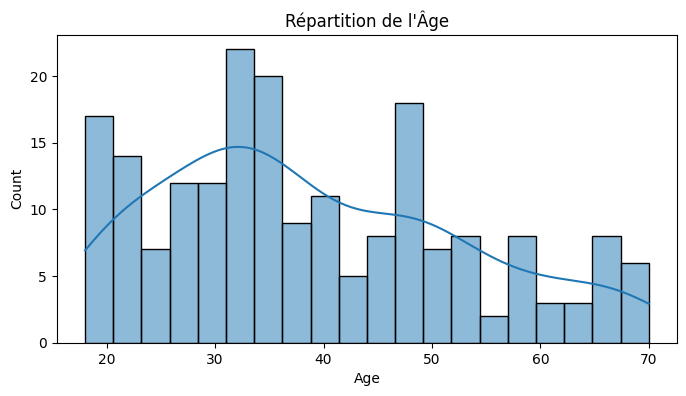

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Age'], kde=True, bins=20)
plt.title('Répartition de l\'Âge')
plt.show()

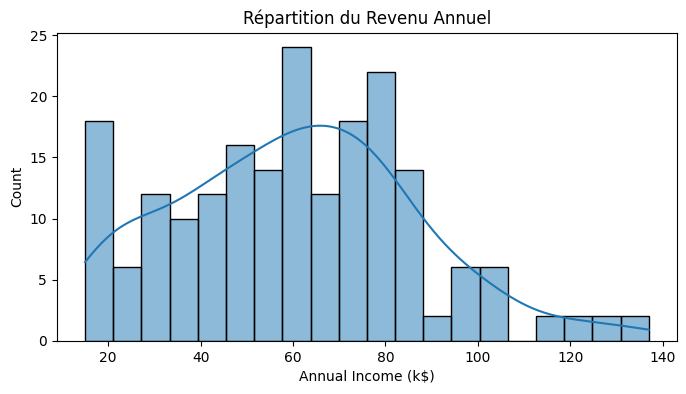

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Répartition du Revenu Annuel')
plt.show()

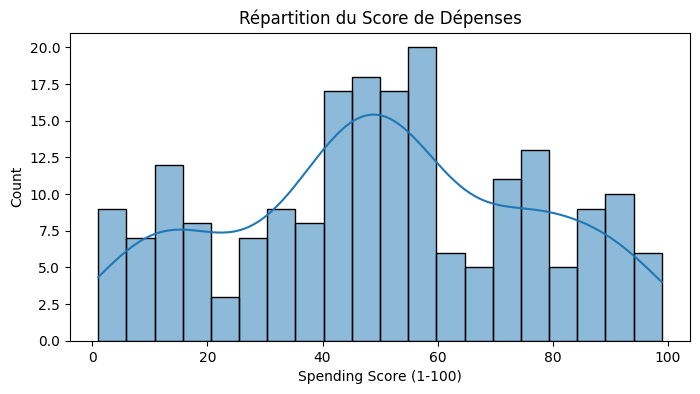

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Répartition du Score de Dépenses')
plt.show()

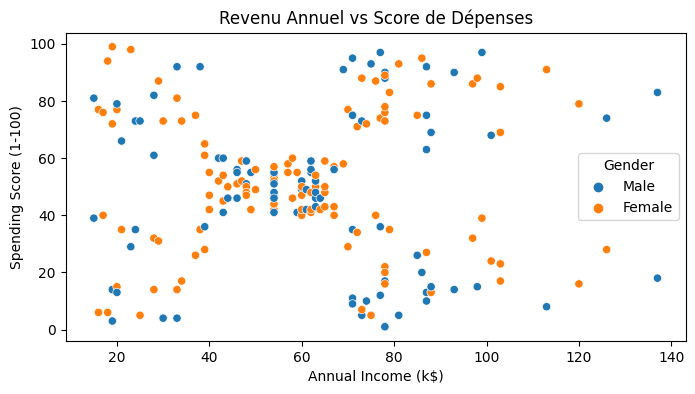

In [14]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=mall_customers_df)
plt.title('Revenu Annuel vs Score de Dépenses')
plt.show()

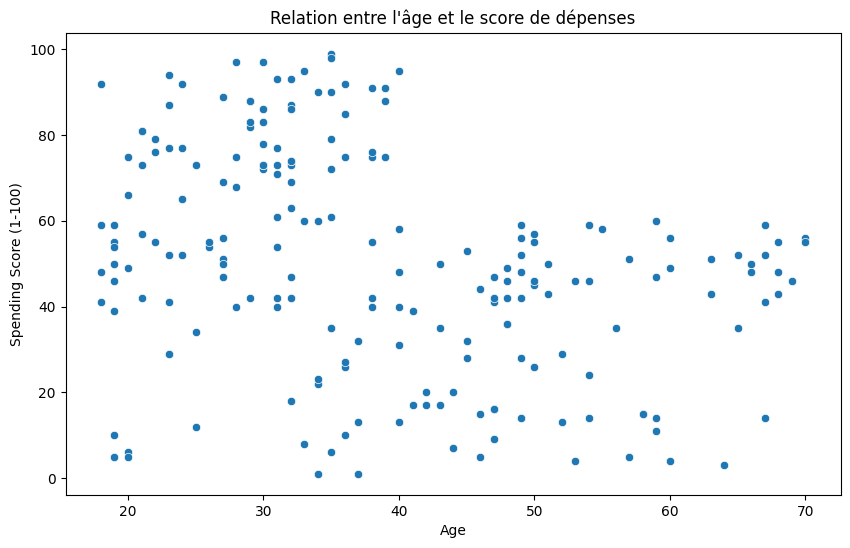

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_customers_df)
plt.title('Relation entre l\'âge et le score de dépenses')
plt.show()

# Preprocessing

In [16]:
label_encoder = LabelEncoder()
mall_customers_df['Gender'] = label_encoder.fit_transform(mall_customers_df['Gender'])

# Sélection des variables pertinentes
features = mall_customers_df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Méthode du coude

In [17]:
from sklearn.cluster import KMeans

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

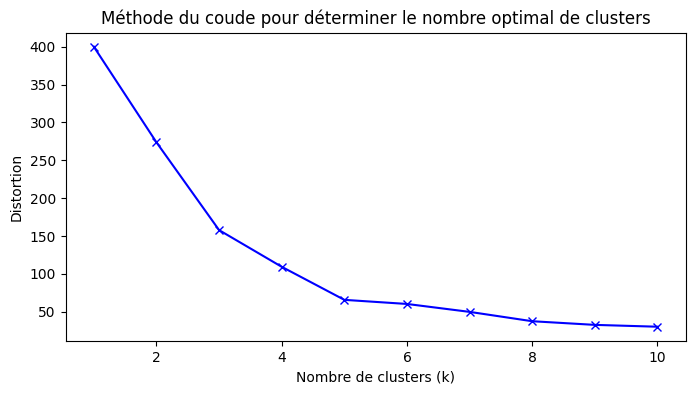

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distortion')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

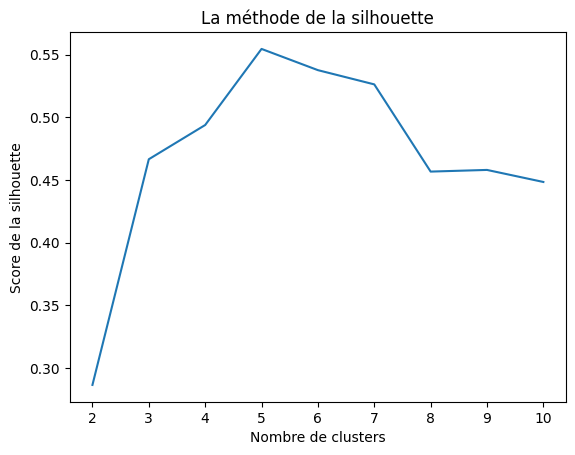

In [19]:
silhouette_avg = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(scaled_features, cluster_labels))

plt.plot(range(2, 11), silhouette_avg)
plt.title('La méthode de la silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de la silhouette')
plt.show()

# K-Means

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
mall_customers_df['Cluster'] = kmeans.fit_predict(scaled_features)

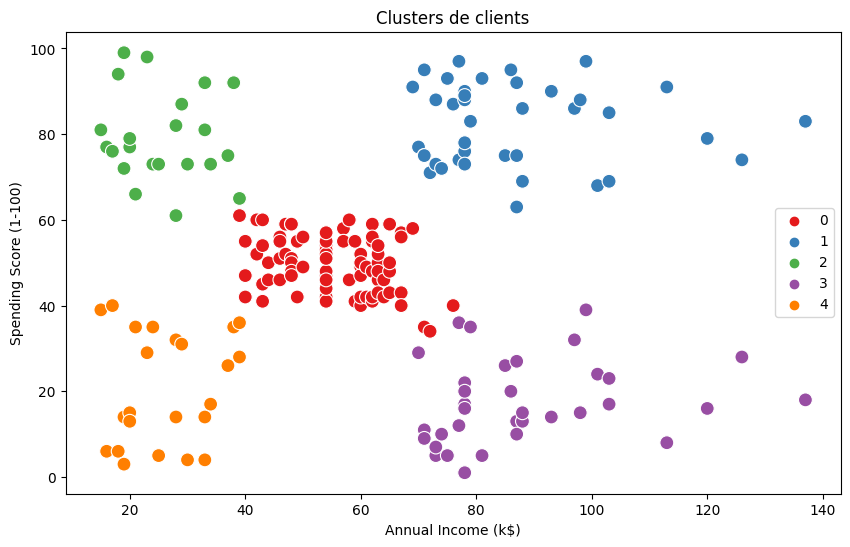

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=mall_customers_df, palette='Set1', s=100)
plt.title('Clusters de clients')
plt.legend()
plt.show()

In [22]:
cluster_profiles = mall_customers_df.groupby('Cluster').mean()
cluster_profiles

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,86.320988,0.407407,42.716049,55.296296,49.518519
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,23.090909,0.409091,25.272727,25.727273,79.363636
3,164.371429,0.542857,41.114286,88.200000,17.114286
4,23.000000,0.391304,45.217391,26.304348,20.913043


# Agglomerative Clustering

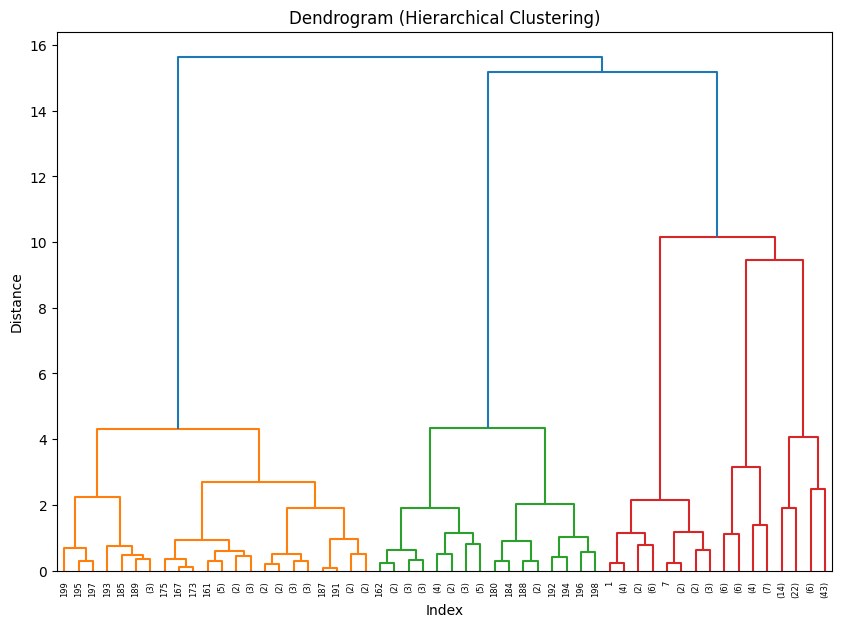

In [23]:
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [24]:
agg_cluster = AgglomerativeClustering(n_clusters=5)
mall_customers_df['Agg_Cluster'] = agg_cluster.fit_predict(scaled_features)

mall_customers_df.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Agg_Cluster
0,1,1,19,15,39,4,4
1,2,1,21,15,81,2,3
2,3,0,20,16,6,4,4
3,4,0,23,16,77,2,3
4,5,0,31,17,40,4,4
5,6,0,22,17,76,2,3
6,7,0,35,18,6,4,4
7,8,0,23,18,94,2,3
8,9,1,64,19,3,4,4
9,10,0,30,19,72,2,3


In [25]:
best_score = -1
best_n_clusters = 0
best_linkage = ''
for n_clusters in range(2, 11):
    for linkage in ['ward', 'complete', 'average', 'single']:
        agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        cluster_labels = agg_cluster.fit_predict(scaled_features)
        silhouette_avg = silhouette_score(scaled_features, cluster_labels)
        print(f'For n_clusters = {n_clusters}, linkage = {linkage}, the average silhouette_score is : {silhouette_avg}')
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_n_clusters = n_clusters
            best_linkage = linkage

print(f'Best number of clusters: {best_n_clusters}')
print(f'Best linkage method: {best_linkage}')
print(f'Best silhouette score: {best_score}')

For n_clusters = 2, linkage = ward, the average silhouette_score is : 0.3842337621772661
For n_clusters = 2, linkage = complete, the average silhouette_score is : 0.36071083057634334
For n_clusters = 2, linkage = average, the average silhouette_score is : 0.3842337621772661
For n_clusters = 2, linkage = single, the average silhouette_score is : 0.43387620121792864
For n_clusters = 3, linkage = ward, the average silhouette_score is : 0.4610481446570447
For n_clusters = 3, linkage = complete, the average silhouette_score is : 0.46658474419000145
For n_clusters = 3, linkage = average, the average silhouette_score is : 0.46658474419000145
For n_clusters = 3, linkage = single, the average silhouette_score is : 0.3613319297400044
For n_clusters = 4, linkage = ward, the average silhouette_score is : 0.4925507715349343
For n_clusters = 4, linkage = complete, the average silhouette_score is : 0.49588122834195303
For n_clusters = 4, linkage = average, the average silhouette_score is : 0.49588122

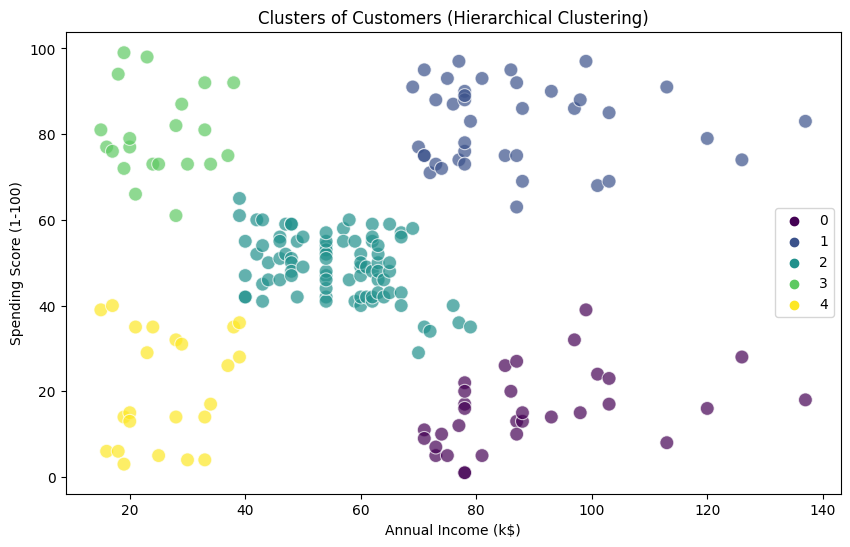

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_customers_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## DBSCAN

In [27]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

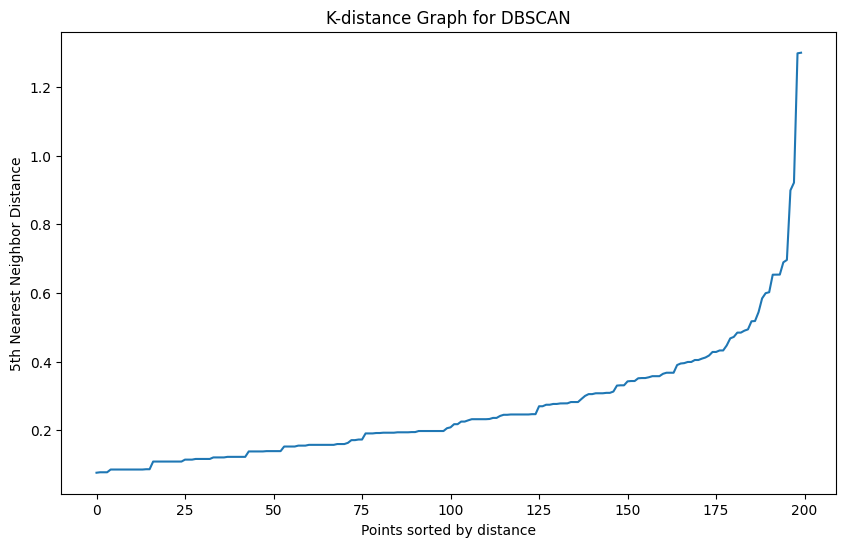

In [28]:
distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

In [29]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
mall_customers_df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Visualiser les clusters selon l'âge


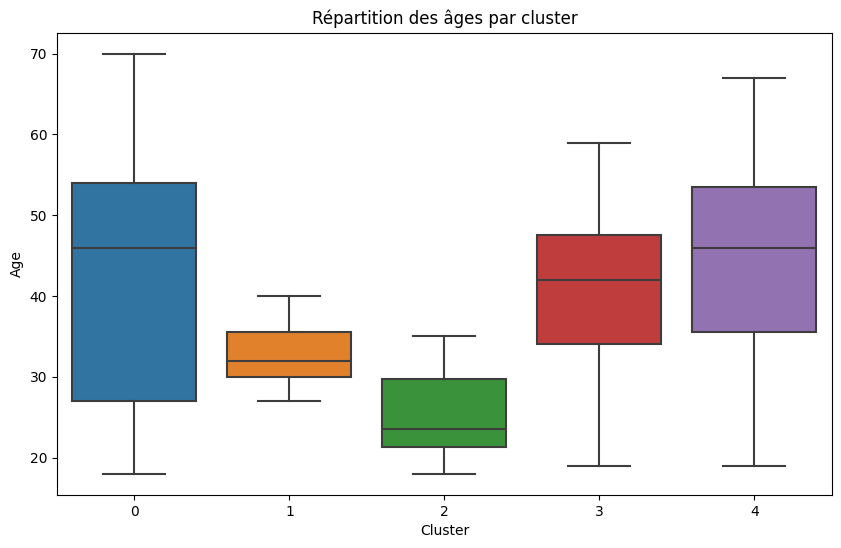

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=mall_customers_df)
plt.title('Répartition des âges par cluster')
plt.show()

# Visualiser les clusters selon le genre


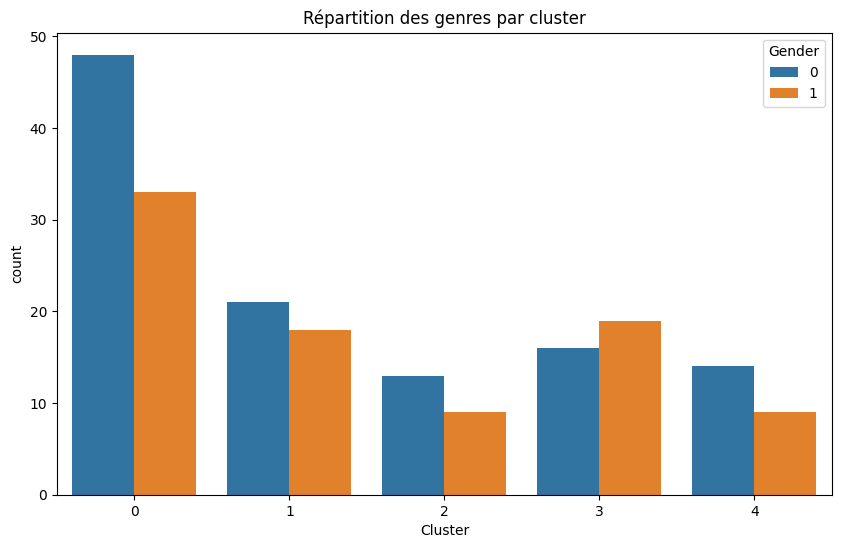

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=mall_customers_df)
plt.title('Répartition des genres par cluster')
plt.show()

# Visualiser les clusters selon les revenus annuels


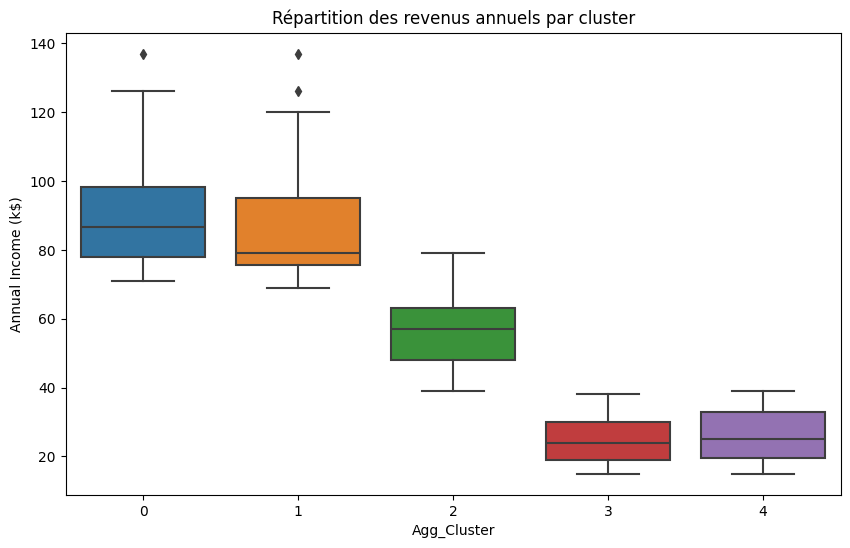

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Agg_Cluster', y='Annual Income (k$)', data=mall_customers_df)
plt.title('Répartition des revenus annuels par cluster')
plt.show()

# Evaluation

In [33]:
kmeans_silhouette = silhouette_score(scaled_features, mall_customers_df['Cluster'])
hierarchical_silhouette = silhouette_score(scaled_features, mall_customers_df['Agg_Cluster'])
dbscan_silhouette = silhouette_score(scaled_features, mall_customers_df['DBSCAN_Cluster'])

kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette

(0.5546571631111091, 0.5538089226688662, 0.35044619989666004)

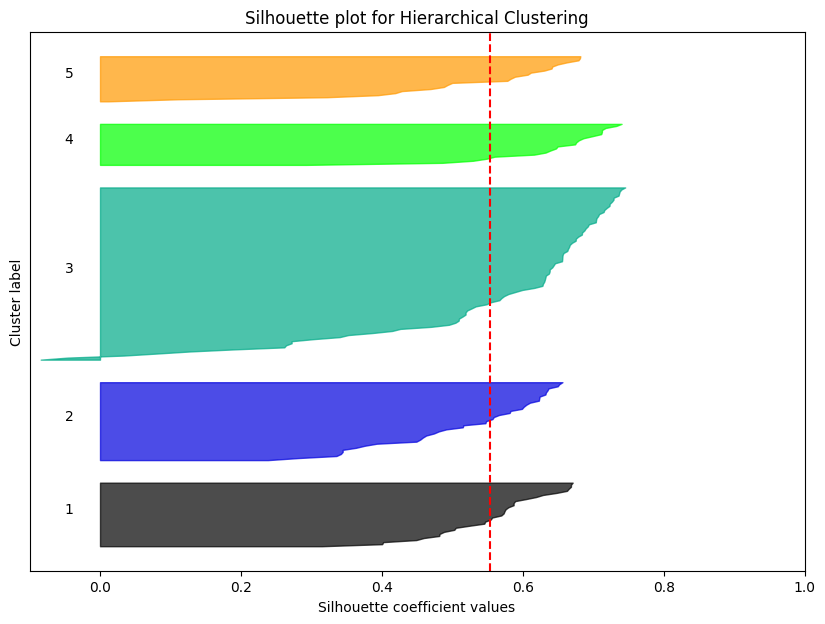

In [34]:
n_clusters = len(np.unique(mall_customers_df['Agg_Cluster']))
silhouette_avg = silhouette_score(scaled_features, mall_customers_df['Agg_Cluster'])
sample_silhouette_values = silhouette_samples(scaled_features, mall_customers_df['Agg_Cluster'])

fig, ax = plt.subplots(figsize=(10, 7))

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[mall_customers_df['Agg_Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

    y_lower = y_upper + 10

ax.set_title("Silhouette plot for Hierarchical Clustering")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])

plt.show()


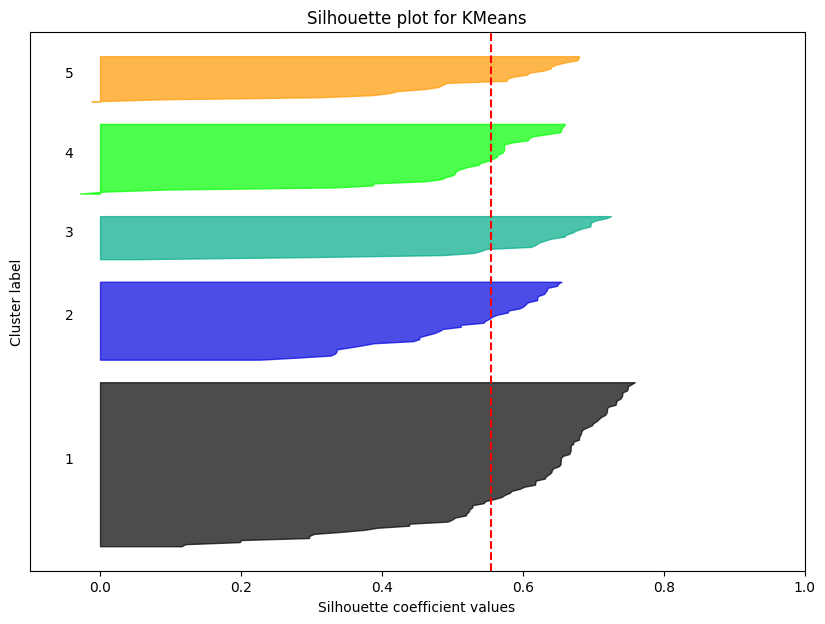

In [35]:
n_clusters = len(np.unique(mall_customers_df['Cluster']))
silhouette_avg = silhouette_score(scaled_features, mall_customers_df['Cluster'])
sample_silhouette_values = silhouette_samples(scaled_features, mall_customers_df['Cluster'])

fig, ax = plt.subplots(figsize=(10, 7))

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[mall_customers_df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

    y_lower = y_upper + 10

ax.set_title("Silhouette plot for KMeans")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])

plt.show()

In [36]:
start_time = time.time()
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_time = time.time() - start_time

start_time = time.time()
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_clustering.fit_predict(scaled_features)
agg_time = time.time() - start_time

print(f"KMeans - Time: {kmeans_time:.4f} seconds, Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Hierarchical Clustering - Time: {agg_time:.4f} seconds, Silhouette Score: {hierarchical_silhouette:.4f}")

KMeans - Time: 0.0026 seconds, Silhouette Score: 0.5547
Hierarchical Clustering - Time: 0.0007 seconds, Silhouette Score: 0.5538


Cluster 1: Faible revenu annuel et faible score de dépense.
Cluster 2: Faible revenu annuel et score de dépense élevé.
Cluster 3: Revenu annuel moyen et score de dépense moyen.
Cluster 4: Revenu annuel élevé et faible score de dépense.
Cluster 5: Revenu annuel élevé et score de dépense élevé.

Cluster 1 (Faible revenu, Faible dépense):
Stratégie: Offres promotionnelles et produits économiques pour attirer ces clients à faible revenu.

Cluster 2 (Faible revenu, Dépense élevée):
Stratégie: Programmes de fidélité et récompenses pour maintenir leur engagement malgré leur faible revenu.

Cluster 3 (Revenu moyen, Dépense moyenne):
Stratégie: Produits de milieu de gamme et services de qualité pour satisfaire leurs besoins.

Cluster 4 (Revenu élevé, Faible dépense):
Stratégie: Campagnes de marketing ciblées pour inciter à dépenser davantage, par exemple des offres sur des produits premium.

Cluster 5 (Revenu élevé, Dépense élevée):
Stratégie: Produits haut de gamme et services exclusifs pour ces clients à fort potentiel de dépense.